# Import Packages

In [19]:
!pip3 install numpy
!pip3 install pandas
!pip3 install geopandas
!pip3 install regex
!pip3 install unidecode
!pip3 install nltk
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install wordcloud
!pip3 install folium
!pip3 install branca



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 22.0.4 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# Data Structures
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

# Corpus Processing
import re
import nltk.corpus
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Convert CSV to information fo ML Model


In [73]:
import pandas as pd
df = pd.read_csv("HazardInsurance.csv")
dataset = df[df['ocr_doc_page_num'] == 1]
dataset.head()

,uuid,ll_doc_name_reformatted,enc_loan_guid,ll_doc_name,ll_doc_start_page,ll_doc_stop_page,ocr_doc_page_num,ocr_loan_pacakge_page_num,ocr_json_payload,ocr_text,...,enc_nondelind,enc_clientid,enc_clientname,enc_pnmac_adaptor_flag,enc_newurla,ll_doc_category,ll_doc_order,year,month,day
0,65ae2aa6-a47d-4a95-9a4e-7cbb8f096456,Hazard Insurance,0dc04ae9-52d1-4fe3-b0aa-2b842bb5d18e,hazard_insurance,539,542,1,540,"[{""Key"": ""Total Living Area:"", ""Value"": ""2092 ...","['07/19/21 16:36:59 800-776-4737', 'Veterans U...",...,N,700354,"MORTGAGE RESEARCH CENTER, LLC",True,Y,piti,15,2022,5,26
3,78e891a1-d75d-4e1b-8e7f-bb1cb577d87f,Hazard Insurance,1adfea14-b1f6-4549-85e5-ec1ac5e4bf8c,hazard_insurance,212,222,1,213,"[{""Key"": ""Exterior wall type:"", ""Value"": ""100%...","['Renewal House & Home Policy Declarations', '...",...,N,701346,THE FEDERAL SAVINGS BANK,True,Y,piti,15,2022,5,26
13,cf99569c-8a9e-4915-bd25-875bc4b01506,Hazard Insurance,a17cdedd-8c74-4f58-863b-0fec93c0cffa,hazard_insurance,425,426,1,426,"[{""Key"": ""Mailing Address:"", ""Value"": ""90 Gard...","['goosehead', 'PROPERTY INSURANCE BINDER', 'IN...",...,N,700354,"MORTGAGE RESEARCH CENTER, LLC",True,Y,piti,18,2022,5,26
14,a5903412-1b37-430a-8af8-42d073811d2a,Hazard Insurance,ba987dde-13bb-4454-8f12-a6caeb377b15,hazard_insurance,366,367,1,367,"[{""Key"": ""Date Printed:"", ""Value"": ""6/29/21""},...","['Praetorian Insurance Company', 'HOMEOWNERS P...",...,N,700140,DHI MORTGAGE COMPANY LTD,True,Y,piti,18,2022,5,26
15,6d162527-7978-4b6c-92e6-a26f2e56b5a0,Hazard Insurance,543f4198-f53c-4389-bc70-0a8113832782,hazard_insurance,677,738,1,678,"[{""Key"": ""Policy Number:"", ""Value"": ""76926-04-...","['Farmers Smart Plan Condominium Rented to', '...",...,N,700307,KELLER MORTGAGE LLC,True,Y,piti,15,2022,5,26


# Corpus Loading:
we'll extract the ocr text column into a list of texts for our corpus.

In [168]:
corpus = dataset['ocr_text'].tolist()

# Corpus Processing
## 1. Stop Words and Stemming
We will do a data engineering routine with our anthems dataset so later we can make a good statistical model. In order to do so, we'll remove all words that don't contribute to the semantic meaning of the text (words that are not within the english alphabet) and keep all of the remaining words in the simplest format possible, so we can apply a function that gives weights to each word without generating any bias or outliers. To do that there are many techniques to clean up our corpus, among them we will remove the most common words (stop words) and apply stemming, a technique that reduces a word to it's root.

The methods that apply stemming and stop words removal are listed bellow. We will also define a method that removes any words with less than 2 letters or more than 21 letters to clean our corpus even more.

In [169]:
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if not token.lower() in listOfWords]

def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

def stop(word, lis):
    for w in lis:
            word = word.replace(w , '') 
    return word

## 2. The main corpus processing function.
A section back, at the exploration of our dataset, we noticed some words containg weird characters that should be removed. By using RegEx our main processing function will remove unknown ASCII symbols, especial chars, numbers, e-mails, URLs, etc. It also uses the auxiliary funcitions defined above.

In [170]:
def processCorpus(corpus, language):
    stopwords = nltk.corpus.stopwords.words(language)
    common_words = ['insurance', 'policy', 'coverage', 'date', 'may', 'please', 'page', 'property', 'loss', 'the', 'this', 'address']

    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        corpus[index] = stop(corpus[index], common_words)

        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [171]:
language = 'english'
corpus = processCorpus(corpus, language)

In [172]:
vectorizer = TfidfVectorizer(min_df = 0.2)
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))

37797 rows


In [173]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,37787,37788,37789,37790,37791,37792,37793,37794,37795,37796
cost,0.604521,0.210007,0.397027,0.000000,0.075463,0.000000,0.000000,0.000000,0.485924,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.296784,0.0,0.094634,0.000000,0.00000,0.000000
including,0.391445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037018,0.000000,...,0.000000,0.000000,0.000000,0.100199,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
number,0.341186,0.000000,0.000000,0.063184,0.113575,0.077928,0.052328,0.262181,0.021510,0.066163,...,0.232674,0.119556,0.311856,0.116445,0.148891,0.0,0.071214,0.301013,0.10711,0.162143
total,0.327498,0.000000,0.000000,0.454869,0.000000,0.000000,0.000000,0.000000,0.030970,0.000000,...,0.335009,0.000000,0.000000,0.083830,0.107188,0.0,0.102536,0.000000,0.00000,0.116729
construction,0.201594,0.000000,0.000000,0.000000,0.100660,0.138133,0.000000,0.000000,0.076256,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.177857,0.00000,0.000000


# K-Means
Function that runs the K-Means algorithm max_k times and returns a dictionary of each k result

In [174]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               #, n_jobs = -1
                               , random_state = 1
                               , algorithm = 'lloyd')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

## Silhouette Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [175]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


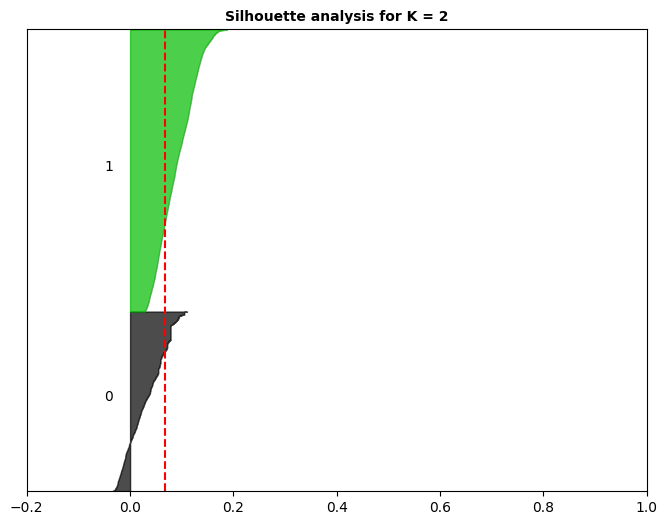

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


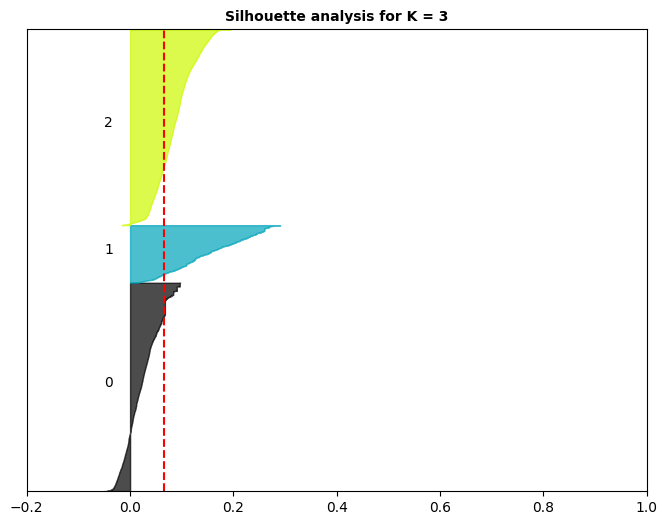

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


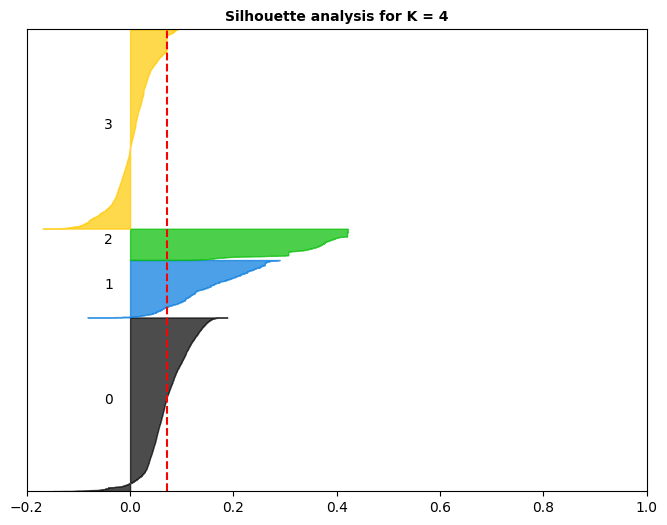

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


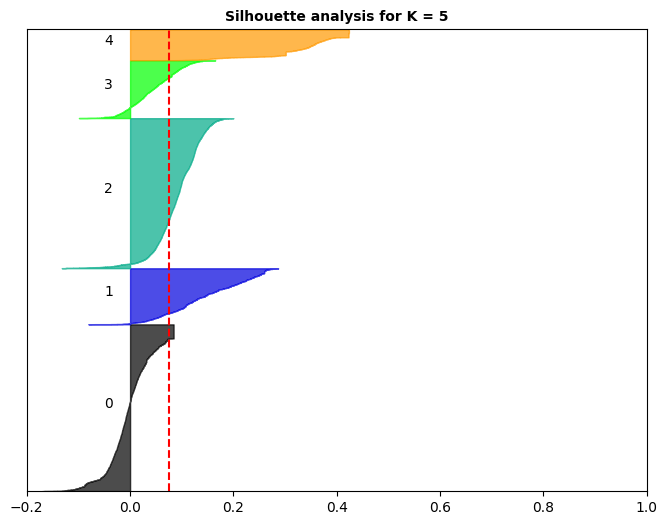

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


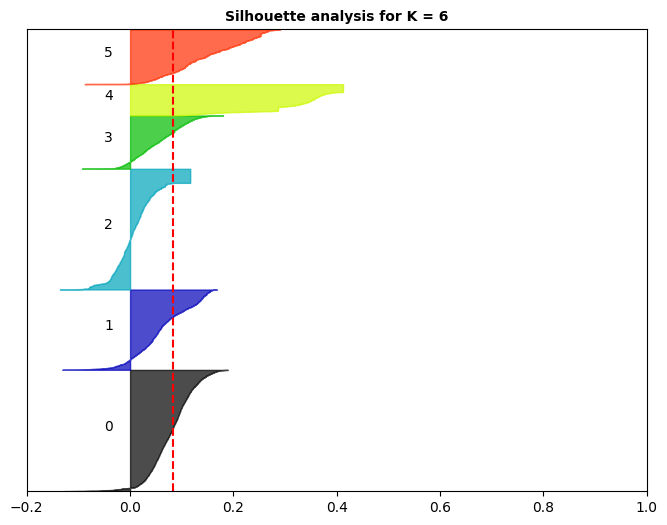

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


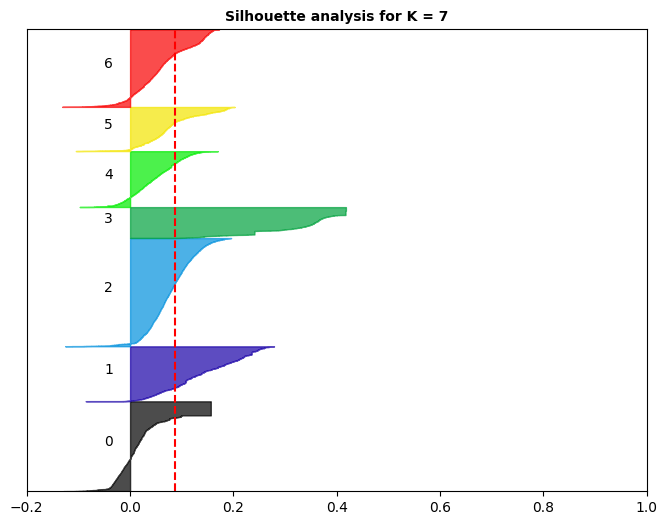

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


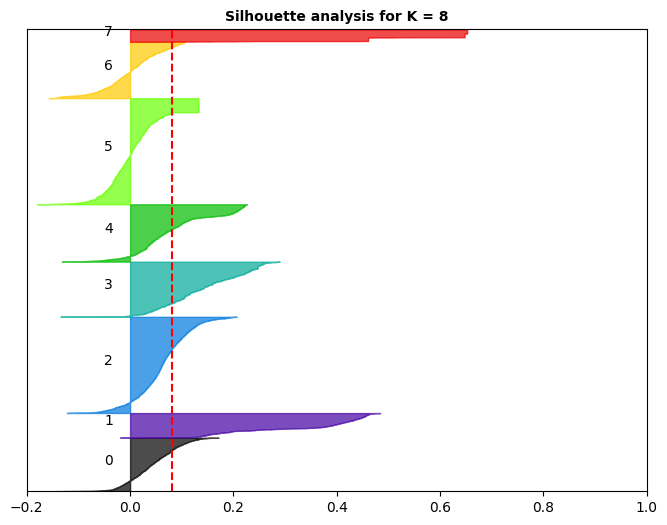

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


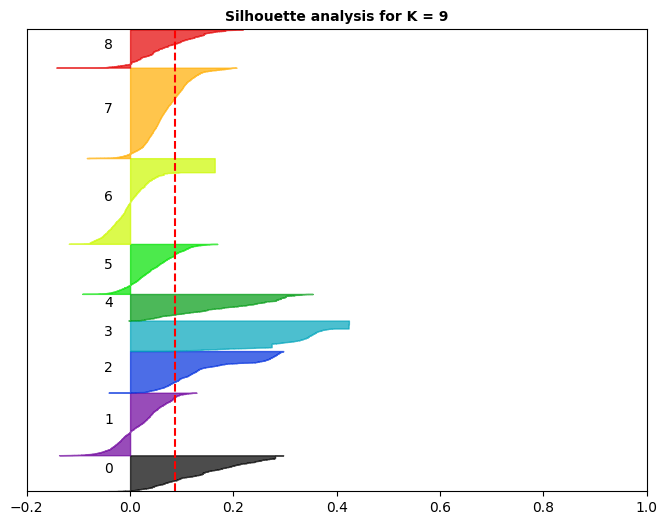

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


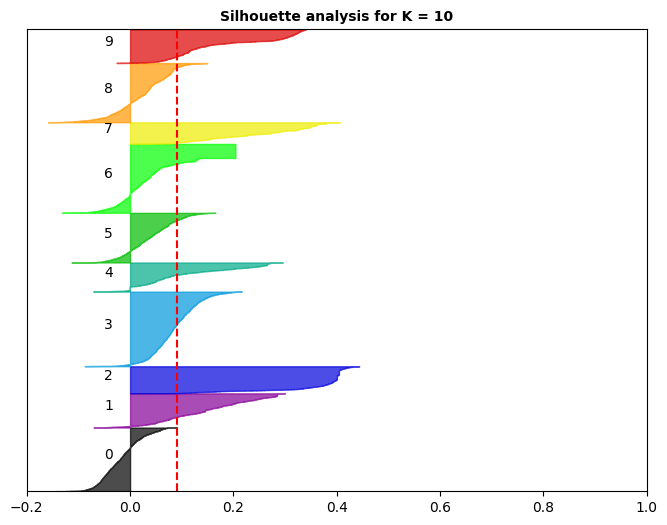

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


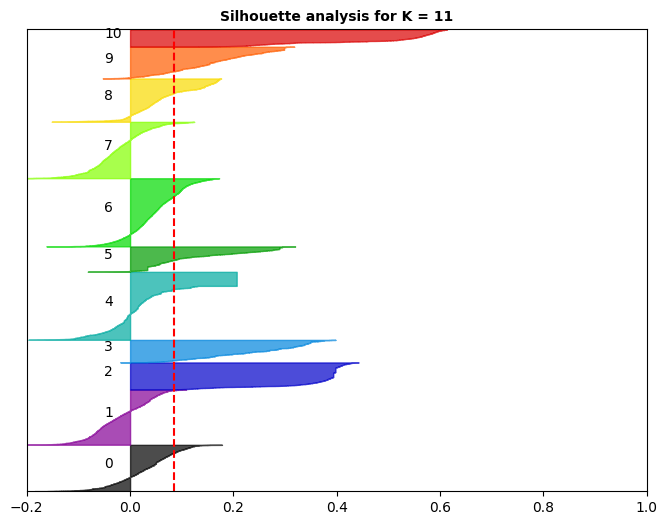

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


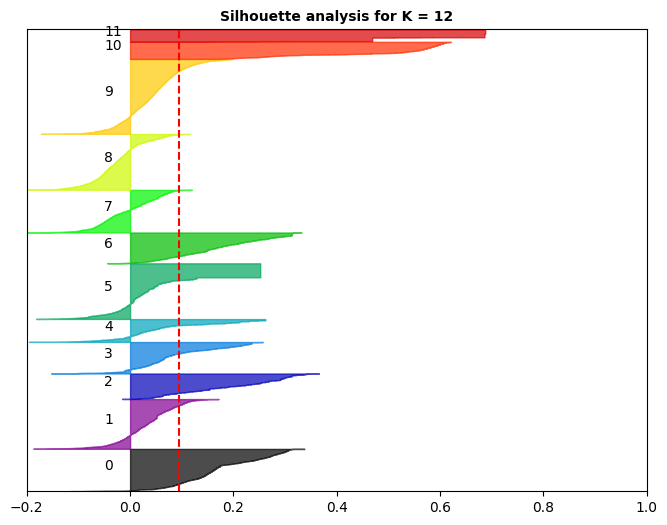

In [176]:
# Running Kmeans
k = 12
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

# Cluster Analysis
Now we can choose the best number of K and take a deeper look at each cluster. Looking at the plots above, we have some clues that when K = 5 is when the clusters are best defined. So first we will use a simple histogram to look at the most dominant words in each cluster:

In [177]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

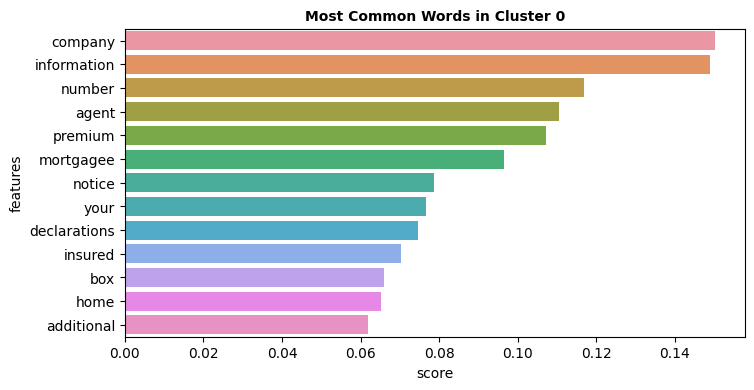

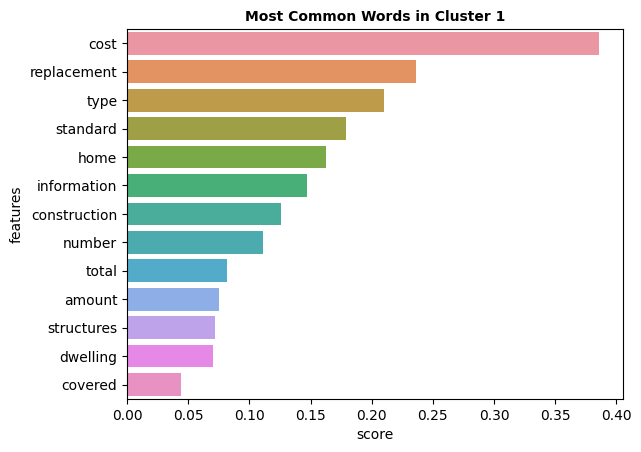

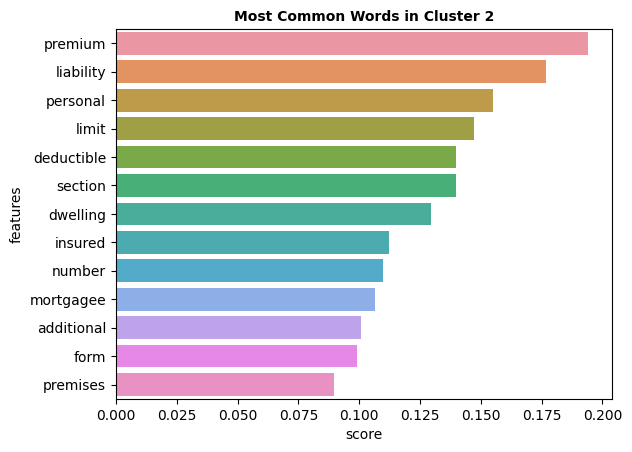

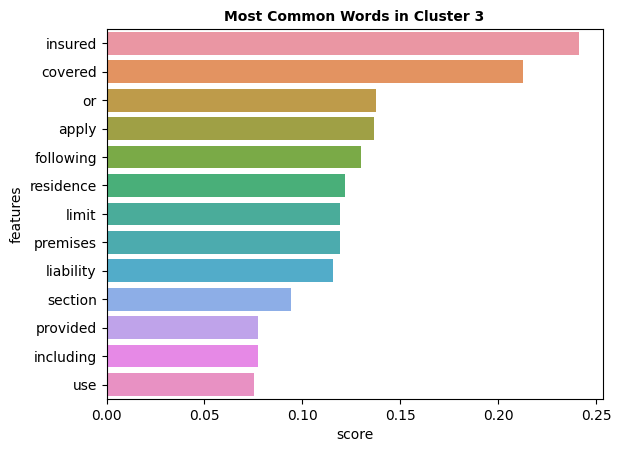

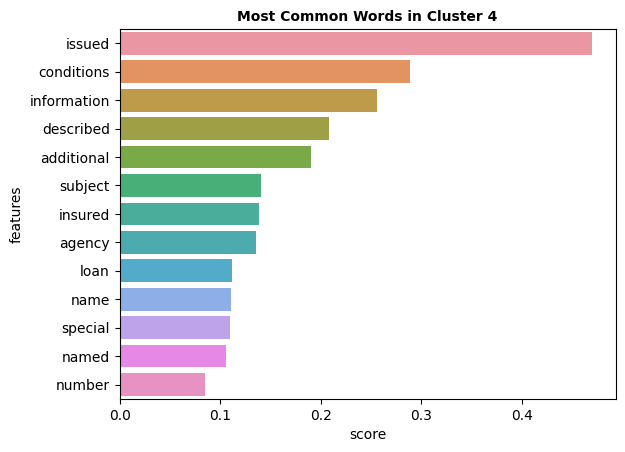

In [178]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [179]:
corpus[:100]

["'veterans united 'homeowner reconstruction cost notification 'general information 'provided 'american strategic 'prepared 'unknownuser/msb unknownuser 'estimate number 'homeowner name somerville cir 'vacaville 'reconstruction cost estimate details 'labor materials supplies 'demolition debris removal 'overhead profit 'permits architects plans including general conditions 'total estimated reconstruction cost including 'cost data 'debris removal 'building description 'main home 'number families 'site access 'flat area/easy access 'roads 'year built 'number stories 'finished living area square feet 'total living area square feet 'construction type 'standard 'slab grade 'concrete 'wall height feet",
 "'veterans united 'building description continued 'perimeter 'rectangular slightly 'irregular note home garage heating and/or air conditioning system displayed report 'not included reconstruction cost calculation unless explicitly specified foundation slope assumed 'degrees 'materials 'exteri

In [180]:
corpus[:100]

["'veterans united 'homeowner reconstruction cost notification 'general information 'provided 'american strategic 'prepared 'unknownuser/msb unknownuser 'estimate number 'homeowner name somerville cir 'vacaville 'reconstruction cost estimate details 'labor materials supplies 'demolition debris removal 'overhead profit 'permits architects plans including general conditions 'total estimated reconstruction cost including 'cost data 'debris removal 'building description 'main home 'number families 'site access 'flat area/easy access 'roads 'year built 'number stories 'finished living area square feet 'total living area square feet 'construction type 'standard 'slab grade 'concrete 'wall height feet",
 "'veterans united 'building description continued 'perimeter 'rectangular slightly 'irregular note home garage heating and/or air conditioning system displayed report 'not included reconstruction cost calculation unless explicitly specified foundation slope assumed 'degrees 'materials 'exteri

In [181]:
index = 0
for frame in dfs:
    print(final_df.head())
    print('Cluster {}'.format(index))
    confidence = silhouette(kmeans_results, frame)
    print('Cluster Confidence {}'.format(confidence))
    common = frame.values.tolist()
    print('Top Common Words: {}'.format(common[:9]))
    index+=1


   additional    agency     agent    amount       and  applicable  apply  box  \
0    0.000000  0.000000  0.000000  0.000000  0.000000    0.000000    0.0  0.0   
1    0.000000  0.000000  0.000000  0.000000  0.270526    0.000000    0.0  0.0   
2    0.000000  0.000000  0.583193  0.141729  0.000000    0.000000    0.0  0.0   
3    0.163689  0.111296  0.000000  0.000000  0.108160    0.000000    0.0  0.0   
4    0.220675  0.000000  0.000000  0.000000  0.097209    0.098474    0.0  0.0   

    company  conditions  ...  special  standard  structures  subject  \
0  0.000000    0.192228  ...      0.0  0.190422    0.000000      0.0   
1  0.000000    0.000000  ...      0.0  0.793817    0.000000      0.0   
2  0.000000    0.000000  ...      0.0  0.000000    0.000000      0.0   
3  0.074693    0.000000  ...      0.0  0.105792    0.097807      0.0   
4  0.000000    0.000000  ...      0.0  0.095082    0.087905      0.0   

       time        to     total      type       use      your  
0  0.000000  0.0

c:\Users\selam\IDP\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'company'